# Homework 4 - Hard Coding

### Group #12: Vishal Matta, Michele Meo, Giulio Rago

## Hashing Task

In [1]:
import os
import time
import math
import matplotlib.pyplot as plt

In [2]:
from utils import hashing_lib as hs

In [3]:
with open ("/Users/Michele/PycharmProjects/ADM-HW4/DATA/passwords1.txt", "r") as file:
    passwords1 = list(file.read().split("\n"))
    
with open ("/Users/Michele/PycharmProjects/ADM-HW4/DATA/passwords2.txt", "r") as file:
    passwords2 = list(file.read().split("\n"))    

passwords1.pop()
passwords2.pop();

In [4]:
print(len(passwords1))
print(len(passwords2))

100000000
39000000


In [5]:
p = 0.01
n = len(passwords1)
m = int(-(n*math.log(p))/(math.log(2)**2))
k = round((m/n)*math.log(2))
print("We choose a rate of false positives of about", p, ": given the number of passwords" 
      "to be registered in the filter,", n, ", we need at least a filter of size", m, "and", k, 
      "different hash functions.")

We choose a rate of false positives of about 0.01 : given the number of passwordsto be registered in the filter, 100000000 , we need at least a filter of size 958505837 and 7 different hash functions.


In [6]:
m = 2**30

In [7]:
bloom_filter = hs.BloomFilter(m)

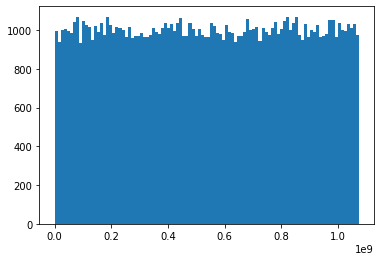

In [10]:
values = bloom_filter.hash_function(passwords1, bloom_filter.primes[2], 0)
bloom_filter.add_to_filter(values)

values = bloom_filter.hash_function(passwords1, bloom_filter.primes[15], 1)
bloom_filter.add_to_filter(values)

values = bloom_filter.hash_function(passwords1, bloom_filter.primes[30], 2)
bloom_filter.add_to_filter(values)

values = bloom_filter.hash_function(passwords1, bloom_filter.primes[45], 3)
bloom_filter.add_to_filter(values)

values = bloom_filter.hash_function(passwords1, bloom_filter.primes[60], 4)
bloom_filter.add_to_filter(values)

values = bloom_filter.hash_function(passwords1, bloom_filter.primes[75], 5)
bloom_filter.add_to_filter(values)

values = bloom_filter.hash_function(passwords1, bloom_filter.primes[90], 6)
bloom_filter.add_to_filter(values)